___
# Project-17_Temperature
___

## Temperature Forecast Project using ML
Problem Statement:
### Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature



Note: Use the link below to download the dataset. 

In [1]:
!pip install feature-engine

In [2]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine
# from scraping some data
import webbrowser


import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing the dataset.
df = pd.read_csv(r'C:\Users\Admin\Desktop\Dataset\temperature.csv')

In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


25 Columns And 7752 rows in above dataset

In [5]:
# shape of the dataset
df.shape

(7752, 25)

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [8]:
# columns of the dataset
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [9]:
# datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


In [10]:
# desription of the dataset
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [11]:
# checking for any missing values in the dataset
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

there are many missing value in dataset

In [12]:
#mean 
df.isna().mean()

station             0.000258
Date                0.000258
Present_Tmax        0.009030
Present_Tmin        0.009030
LDAPS_RHmin         0.009675
LDAPS_RHmax         0.009675
LDAPS_Tmax_lapse    0.009675
LDAPS_Tmin_lapse    0.009675
LDAPS_WS            0.009675
LDAPS_LH            0.009675
LDAPS_CC1           0.009675
LDAPS_CC2           0.009675
LDAPS_CC3           0.009675
LDAPS_CC4           0.009675
LDAPS_PPT1          0.009675
LDAPS_PPT2          0.009675
LDAPS_PPT3          0.009675
LDAPS_PPT4          0.009675
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
Next_Tmax           0.003483
Next_Tmin           0.003483
dtype: float64

<AxesSubplot:>

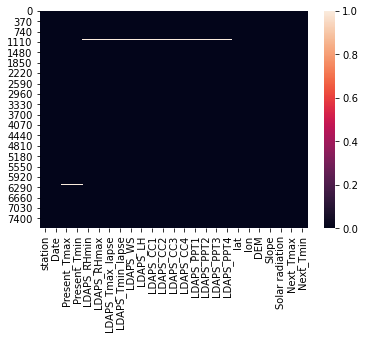

In [13]:
sns.heatmap(df.isna())

In [14]:
# checking for any highly correlated features in the dataset.
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,0.003414,0.000698,0.006159,-0.002748,-0.008369,-0.012671,-0.010580,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108306,0.128719
Present_Tmax,0.113211,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,-0.215816,-0.145513,-0.142497,-0.110001,-0.100420,-0.121271,-0.101471,-0.052776,0.009075,-0.187855,-0.106097,-0.025557,0.613109,0.625252
Present_Tmin,0.132419,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,0.091439,-0.002839,-0.045091,0.114312,0.069095,-0.046645,-0.064394,-0.078715,-0.043725,-0.251257,-0.146736,0.053828,0.473868,0.799758
LDAPS_RHmin,-0.067122,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,0.745443,0.689679,0.514075,0.262665,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.442958,0.095830
LDAPS_RHmax,-0.168010,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,0.391330,0.226957,0.130619,0.268449,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286478,-0.072490
LDAPS_Tmax_lapse,0.069561,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,-0.523619,-0.541327,-0.429539,-0.111065,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.836144,0.591535
LDAPS_Tmin_lapse,0.105422,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,0.047727,-0.044018,-0.080335,0.038056,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.593195,0.886964
LDAPS_WS,0.005320,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,0.261090,0.242991,0.220533,0.152587,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.346592,-0.097390
LDAPS_LH,-0.134226,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,-0.264280,-0.245583,-0.172766,-0.012542,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.159324,-0.055895
LDAPS_CC1,0.006956,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,0.779683,0.517493,0.361046,0.446328,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.457583,-0.011129


<AxesSubplot:ylabel='Density'>

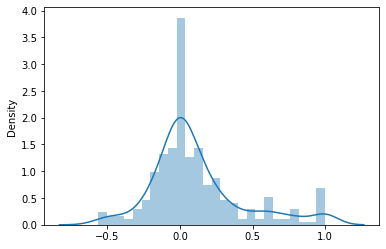

In [15]:
# plotting the correlation
sns.distplot(df.corr())

In [16]:
# helper function
def fig_of_size(x,y):
    return plt.figure(figsize=(x,y))

<AxesSubplot:>

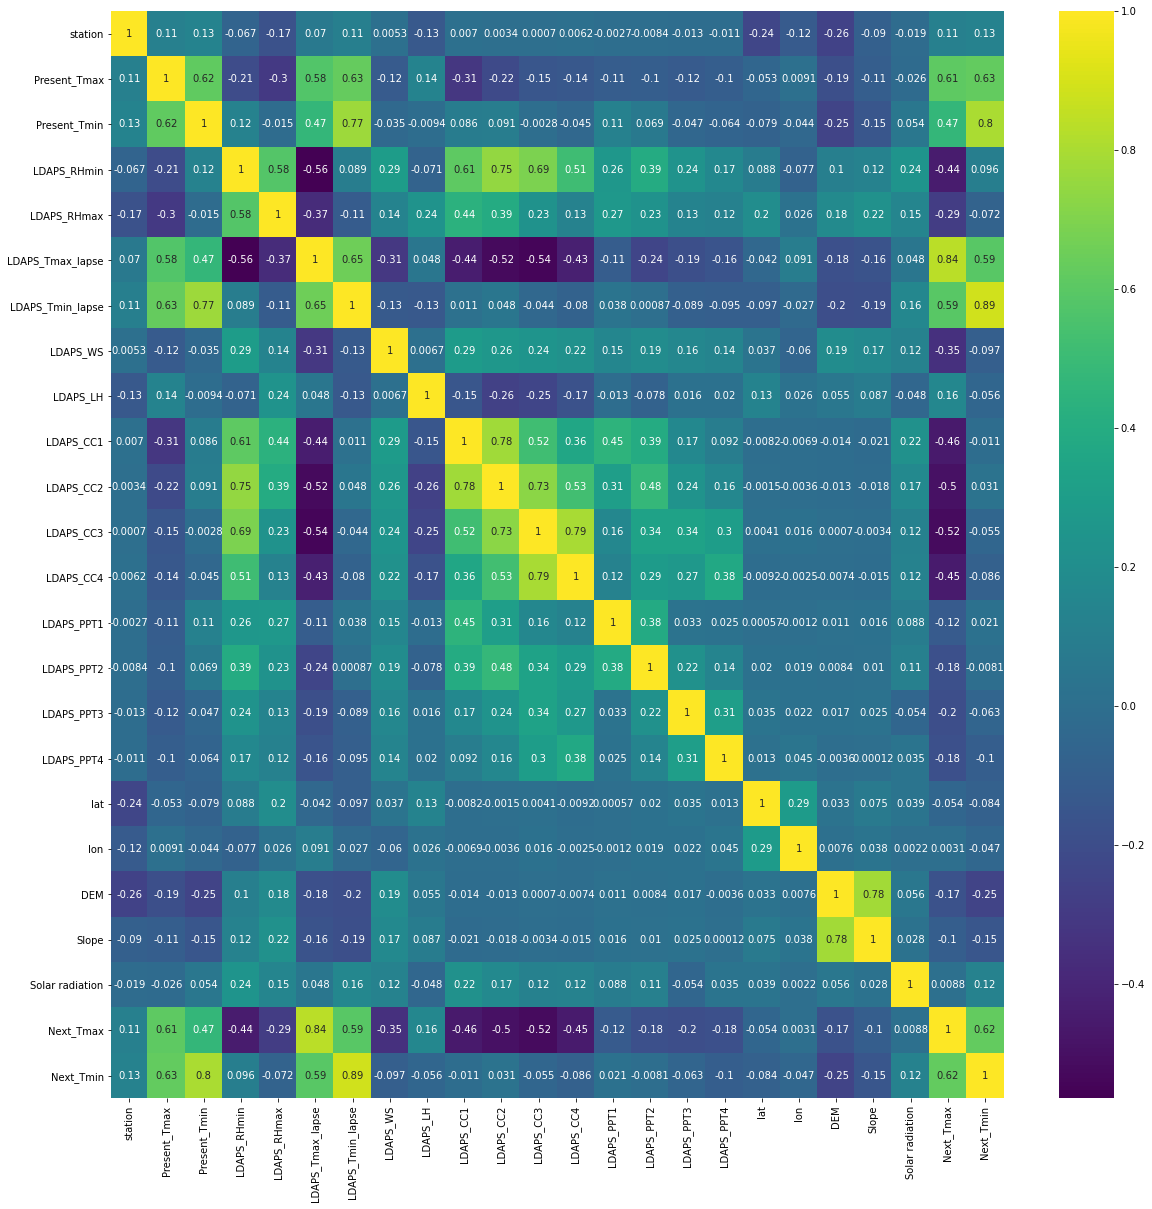

In [17]:
fig_of_size(20,20)
sns.heatmap(df.corr(),annot=True,cmap='viridis')

    * 7750 samples in this dataset
    * The dataset consists of 2 features .
    * There are some outliers in the dataset, all the outliers are loss than 1 percent per feature.
    * There are no highly correlated columns in the dataset.

In [18]:
df.sample(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
5109,10.0,18-07-2016,27.3,19.8,48.019592,88.103111,30.377065,21.076073,6.076080,78.944018,0.010897,0.006173,0.125680,0.098736,0.000000,0.000000,0.0,0.0,37.4562,126.955,208.5070,5.1782,5668.401855,32.3,18.9
367,18.0,14-07-2013,26.6,24.0,67.639130,95.795822,30.288561,23.234642,6.722074,68.445124,0.774320,0.583191,0.323170,0.362159,2.258901,0.387783,0.0,0.0,37.4832,127.024,56.4448,1.2313,5733.504395,31.2,24.0
3942,18.0,02-08-2015,29.9,24.0,65.218384,93.548546,31.232890,25.502569,7.784872,90.666375,0.355197,0.650616,0.349275,0.122962,0.000000,0.007320,0.0,0.0,37.4832,127.024,56.4448,1.2313,5364.618164,34.1,25.8
2640,16.0,12-08-2014,28.9,20.3,70.396492,91.651878,25.621438,22.388958,3.877717,32.456387,0.322858,0.579597,0.632367,0.640578,0.000000,0.000000,0.0,0.0,37.4697,126.995,82.2912,2.2579,5062.422852,26.2,19.0
779,5.0,31-07-2013,30.0,24.4,57.116608,92.495697,30.784407,24.421258,4.087337,111.940126,0.180527,0.140732,0.113067,0.008820,0.000000,0.000000,0.0,0.0,37.5507,127.135,35.0380,0.5055,5414.678711,32.1,24.6


In [19]:
# latitude and logitudes 

<AxesSubplot:xlabel='lon', ylabel='lat'>

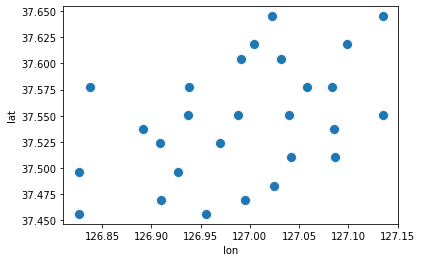

In [20]:
sns.scatterplot(df.lon,df.lat,s=100)

In [21]:
# date
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


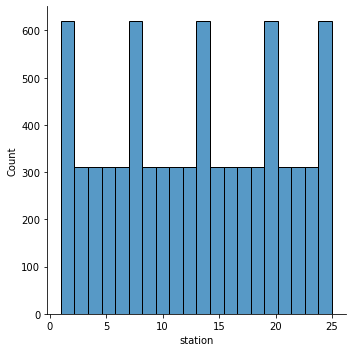

In [22]:
# stations
sns.displot(df.station)

In [23]:
# min and max temperature

<AxesSubplot:>

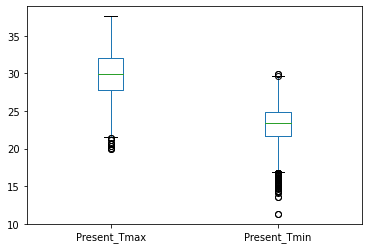

In [24]:
df[['Present_Tmax','Present_Tmin']].plot(kind='box')

# handaling missing values

In [25]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [27]:
num_var = list(df.columns)
num_var.remove('Date')

In [28]:
num_var

['station',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [29]:
# as the missing data is less than 1 percent per nfeature , it is safe to remove that datafrom the dataset.

In [30]:
# create a new dataframe for preprocessing and building the model.
df_cleaned = df.copy()

In [31]:
df_cleaned = df_cleaned.dropna()

In [32]:
df_cleaned.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<AxesSubplot:>

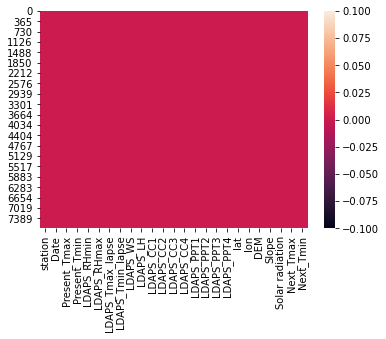

In [33]:
sns.heatmap(df_cleaned.isna())

## Removal of the outliers 

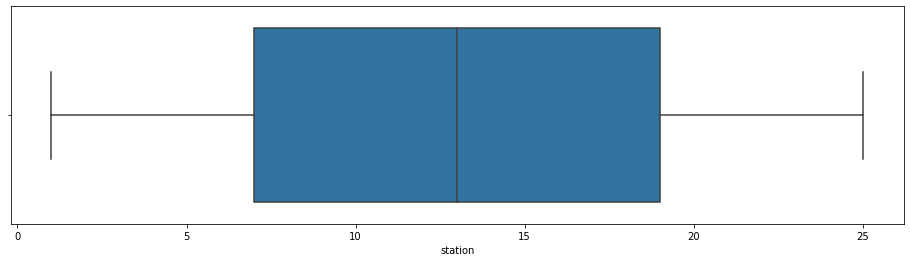

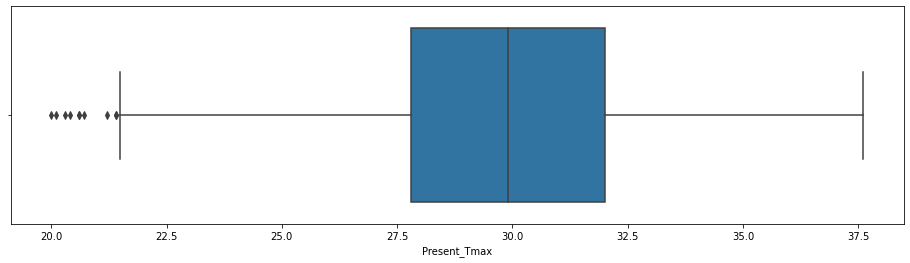

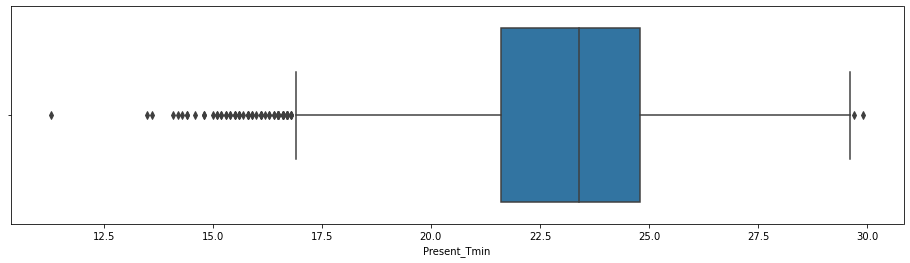

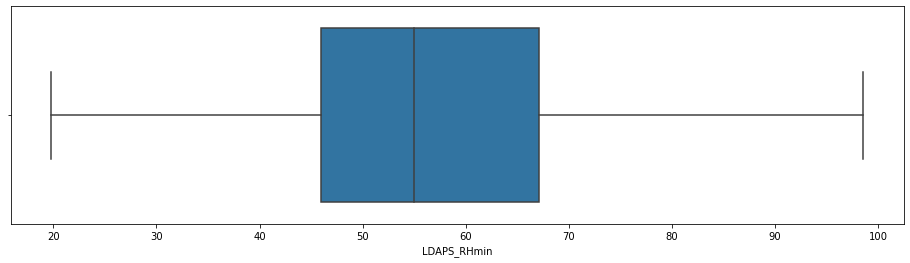

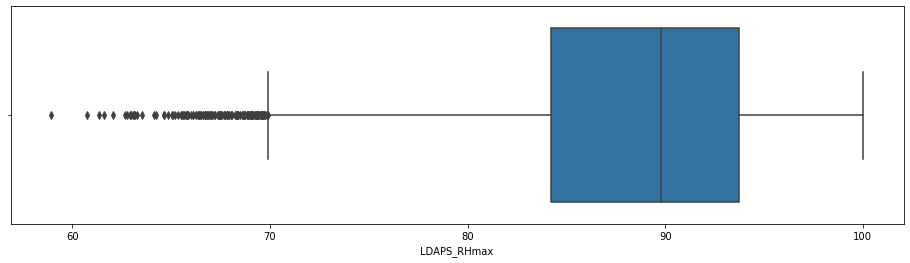

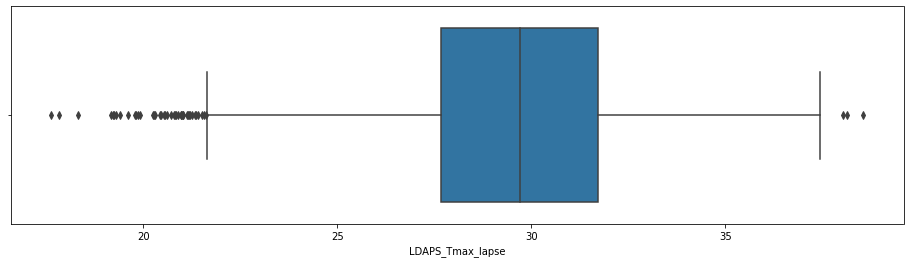

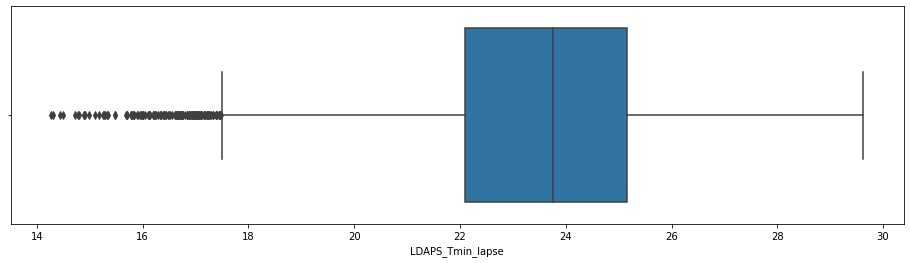

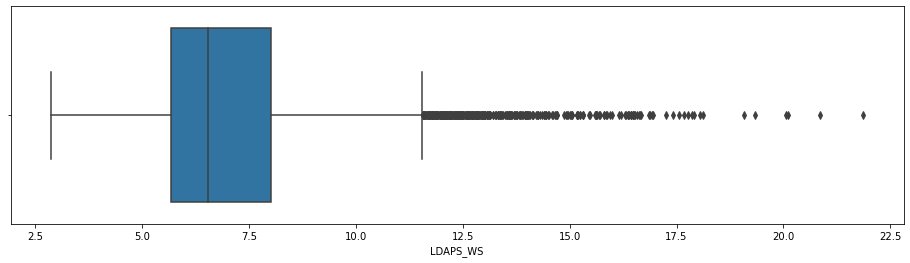

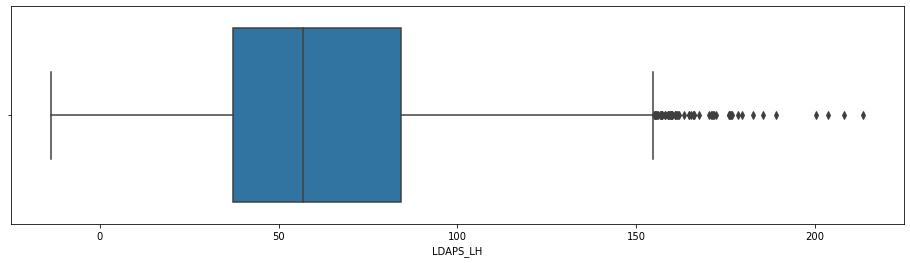

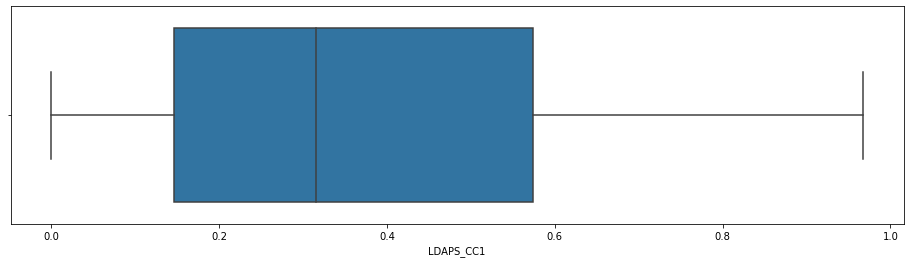

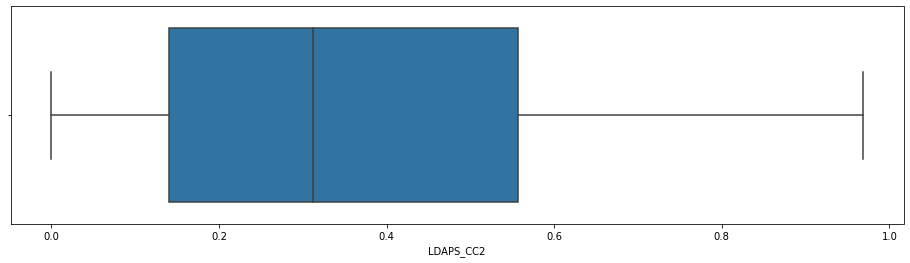

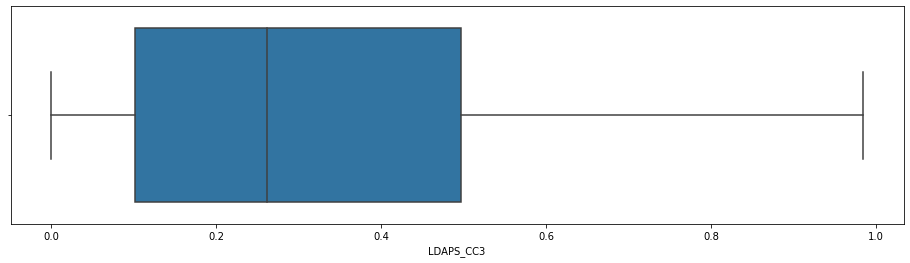

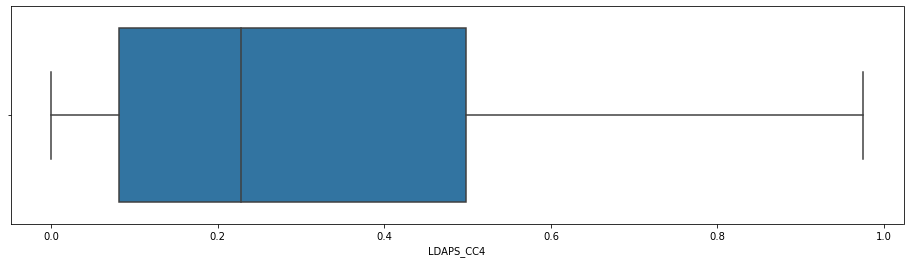

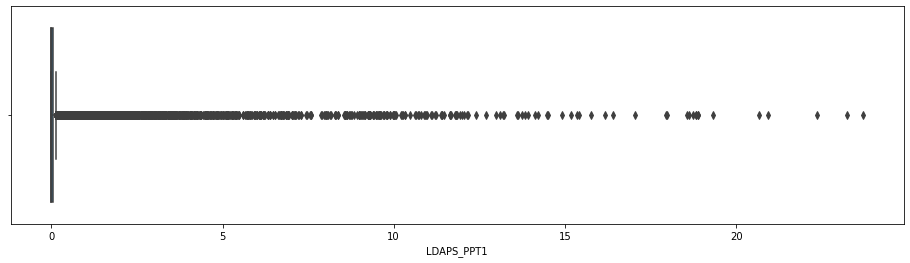

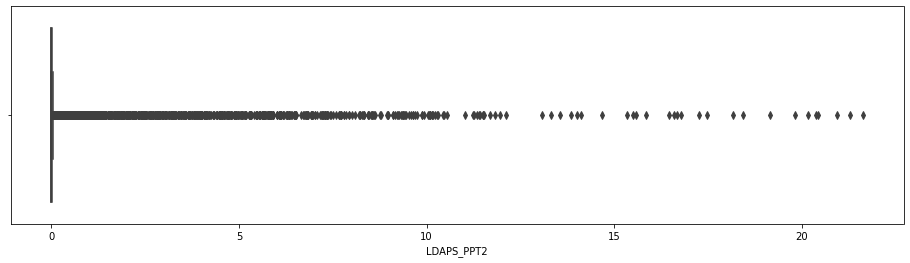

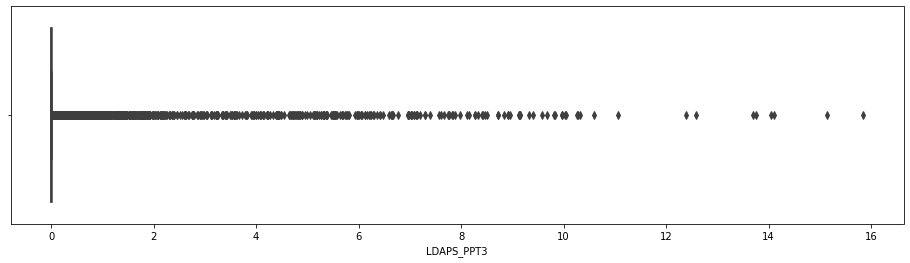

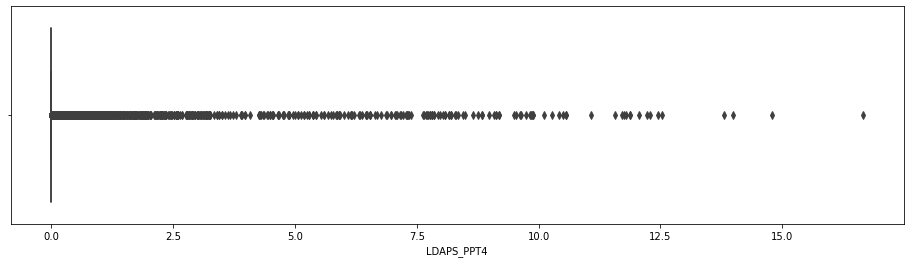

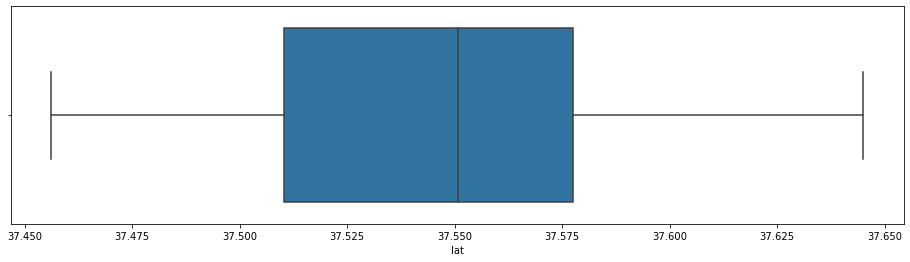

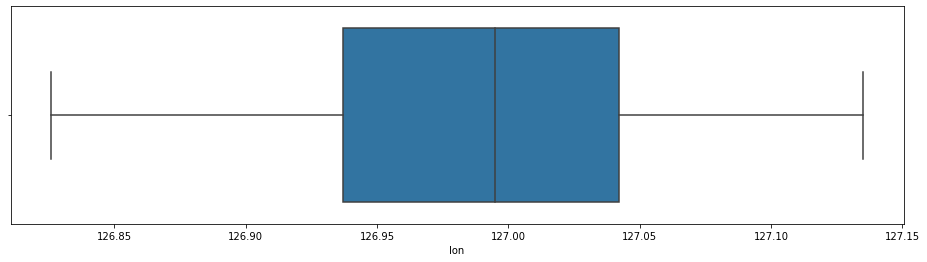

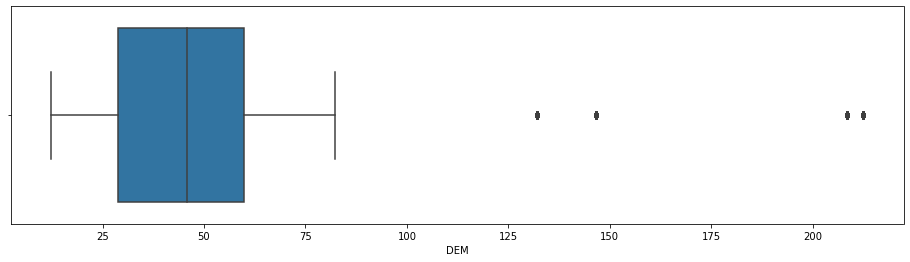

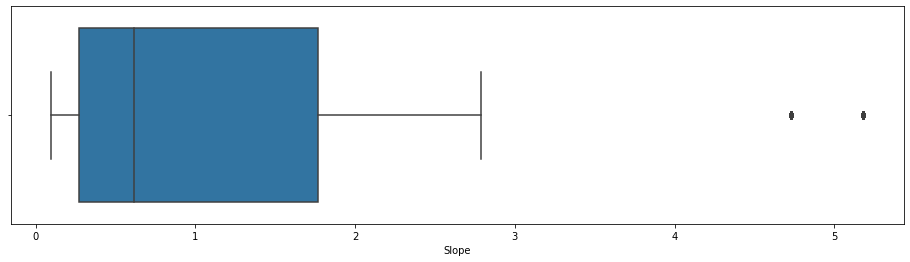

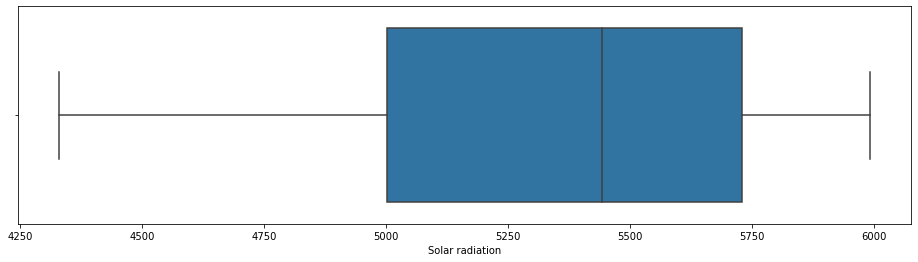

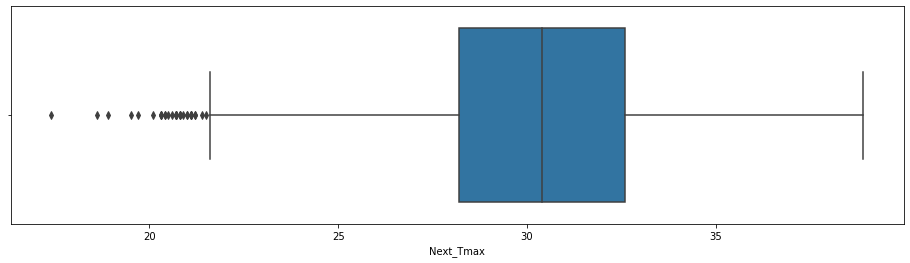

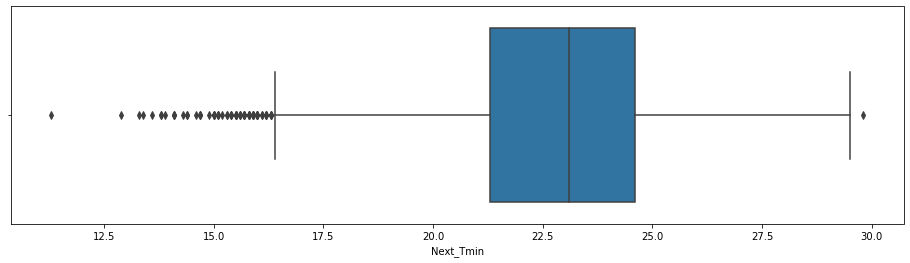

In [34]:
for col in num_var:
    fig_of_size(16,4)
    sns.boxplot(df_cleaned[col])

In [35]:
#  addressing the outliers using z score

In [36]:
z_scores = stats.zscore(df_cleaned[num_var])

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_cleaned = df_cleaned[filtered_entries]

In [37]:
# copamring the dataset before and after the outlier removal

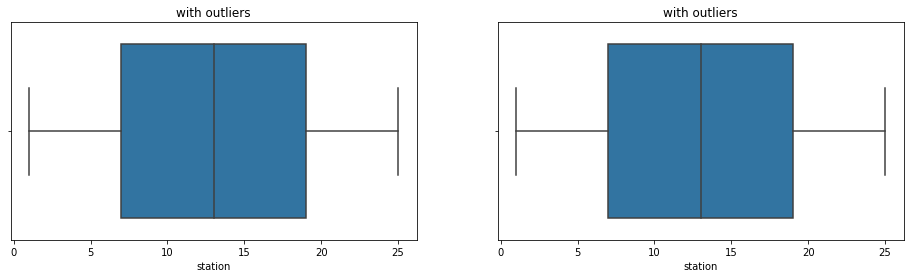

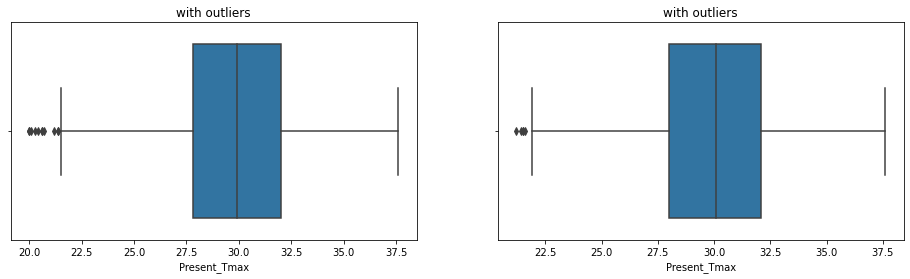

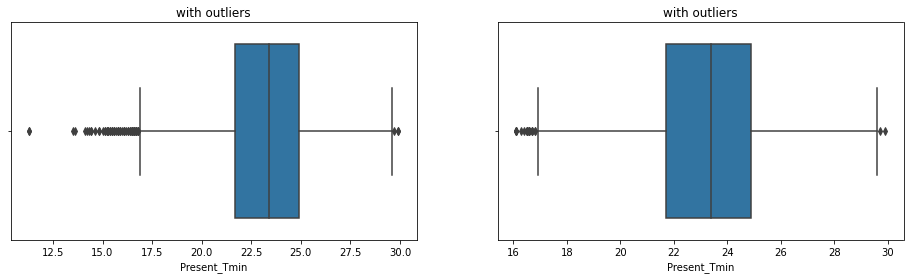

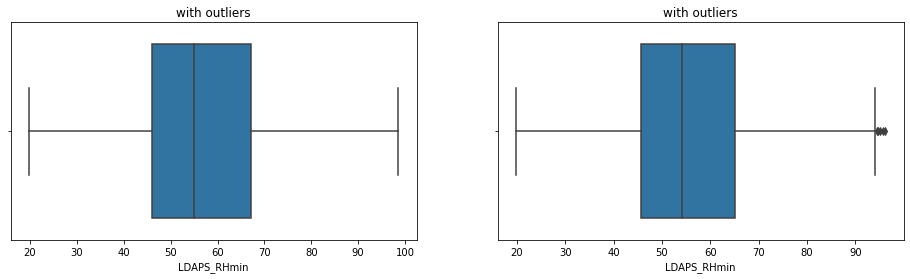

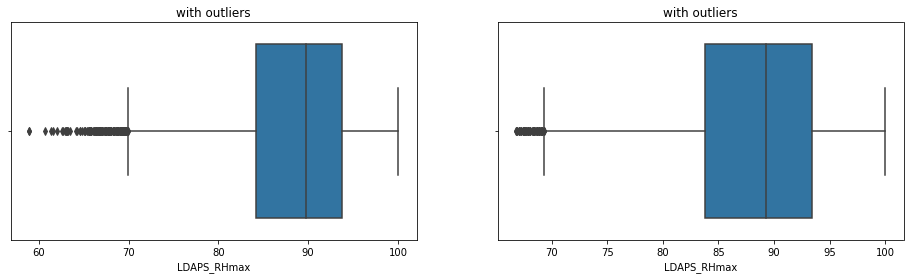

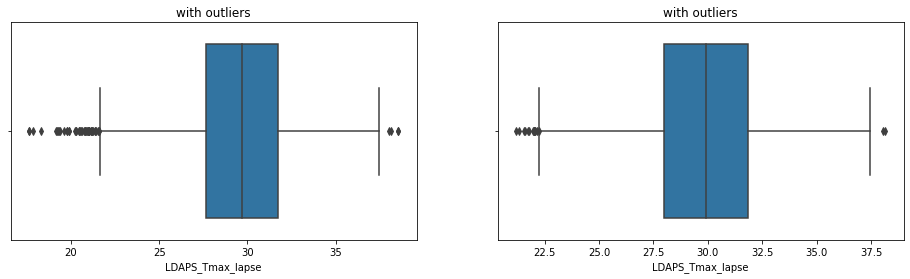

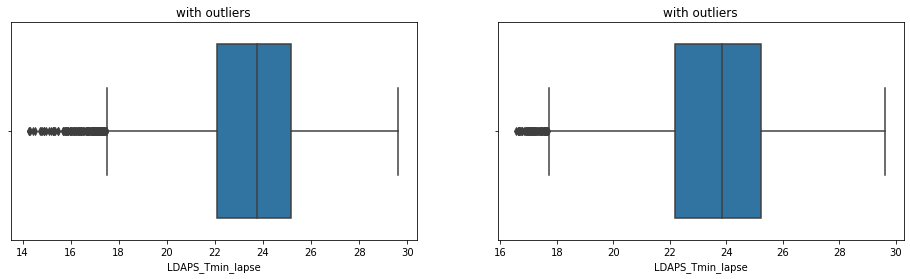

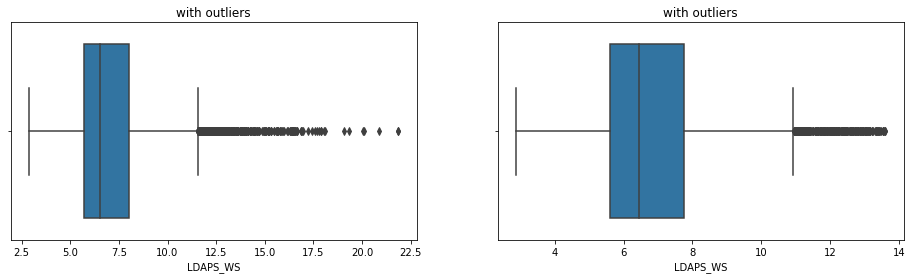

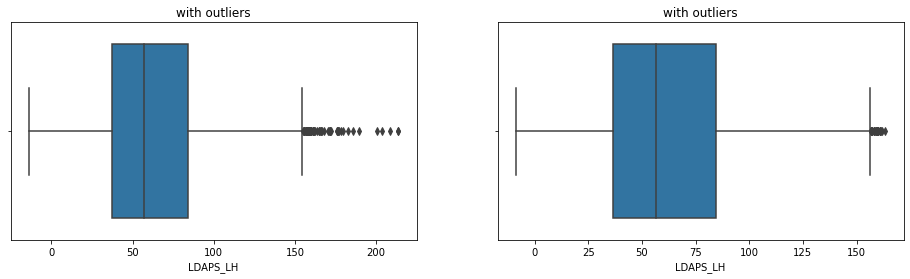

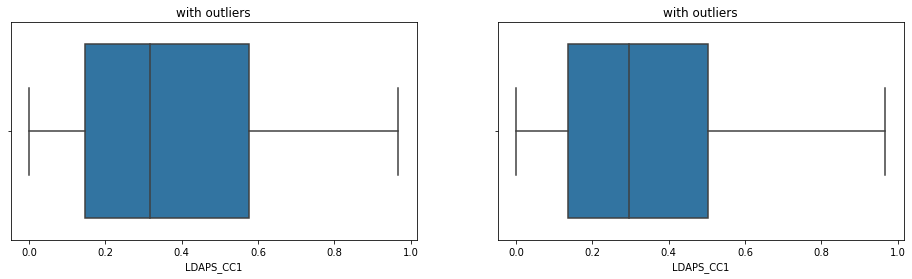

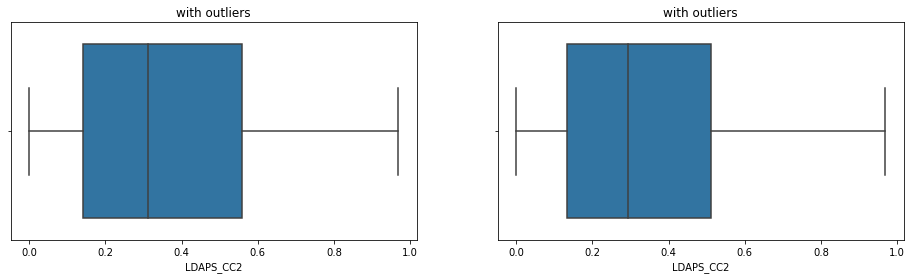

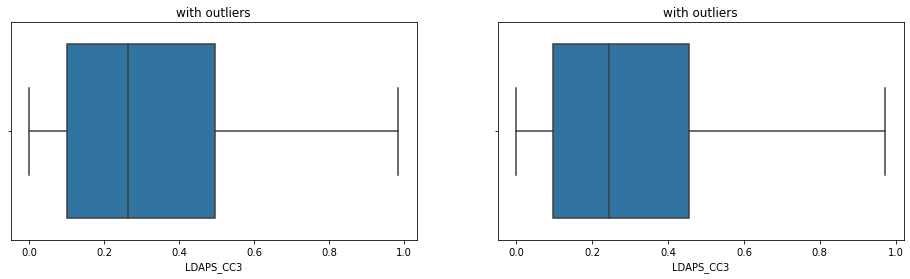

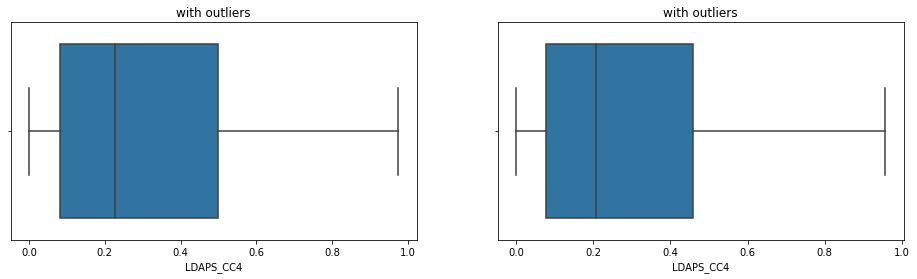

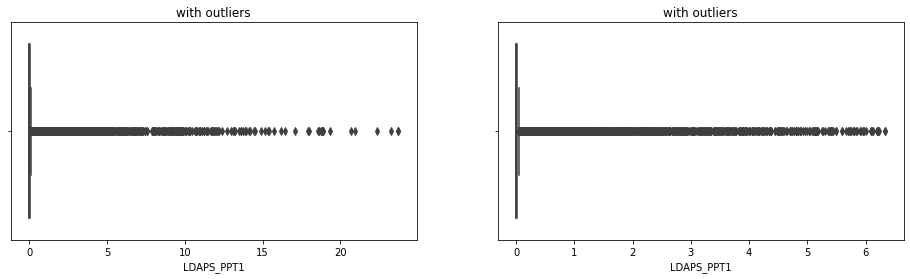

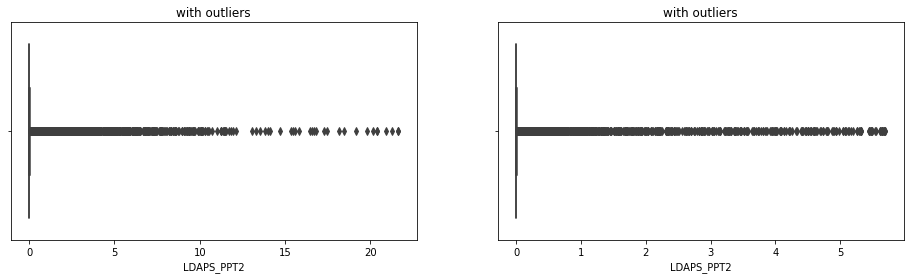

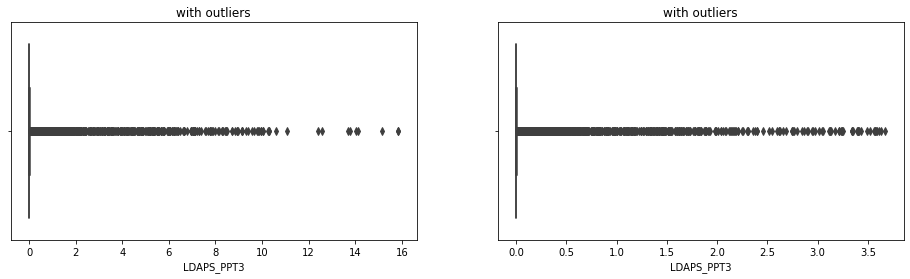

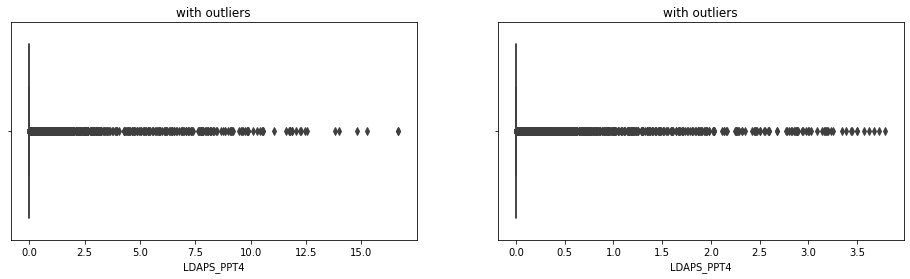

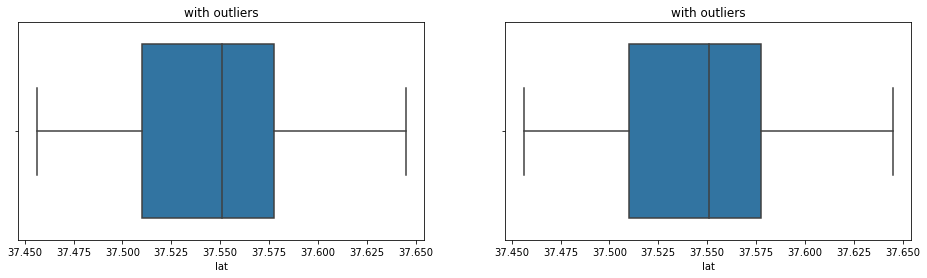

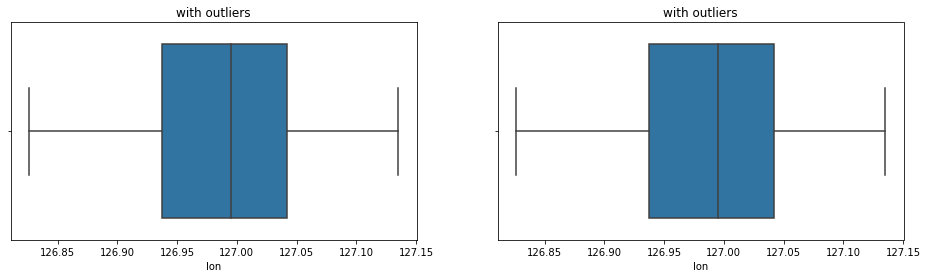

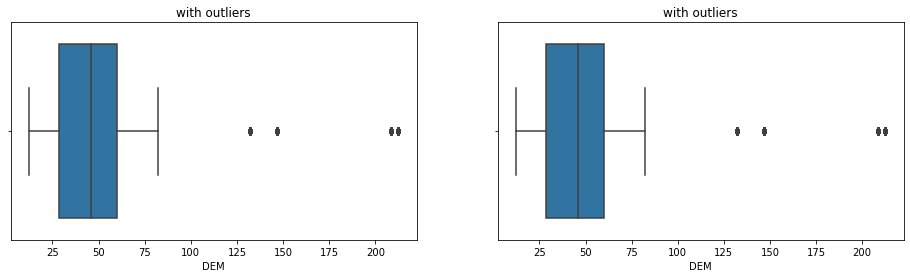

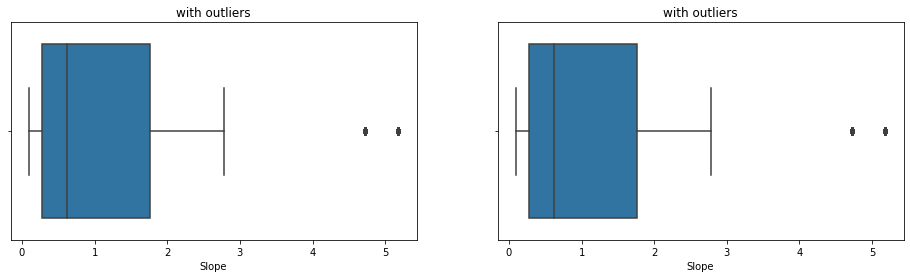

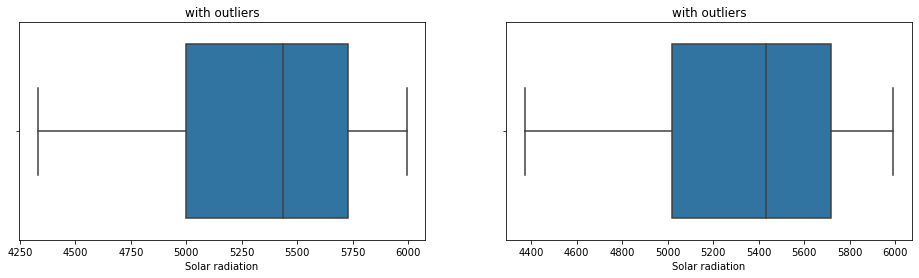

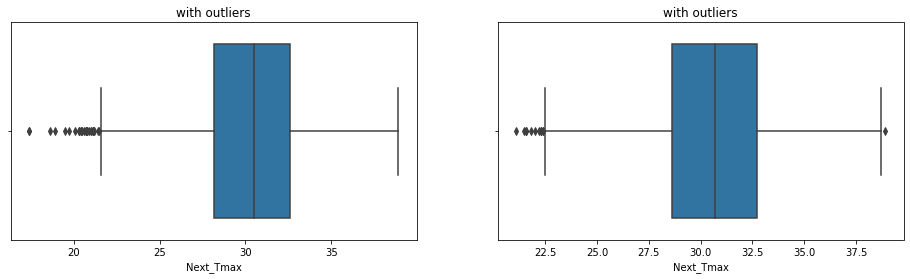

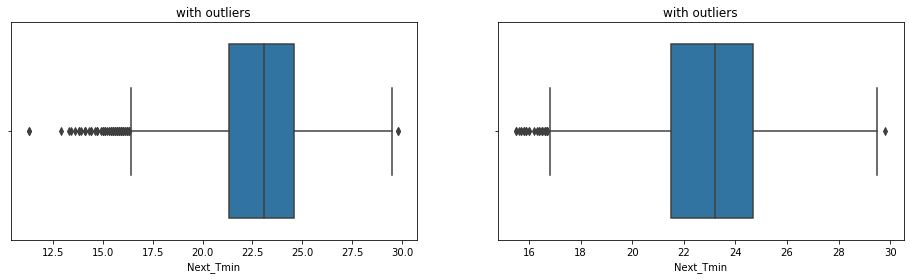

In [38]:
for col in num_var:
    fig = fig_of_size(16,4)
    
    fig.add_subplot(121)
    sns.boxplot(df[col])
    plt.title('with outliers')
    fig.add_subplot(122)
    sns.boxplot(df_cleaned[col])
    plt.title('with outliers')

In [39]:
# we have successfully treated the extreme outliers

In [40]:
## Skew of the featres

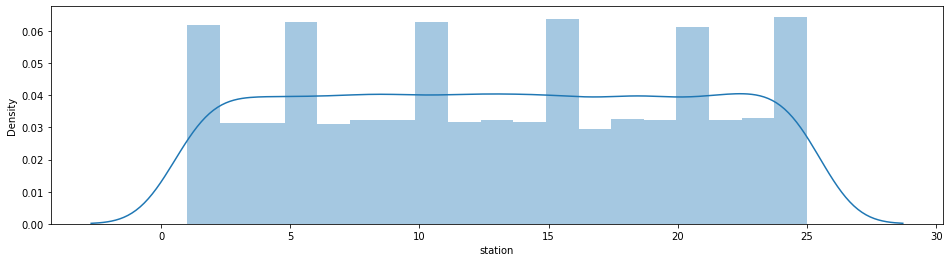

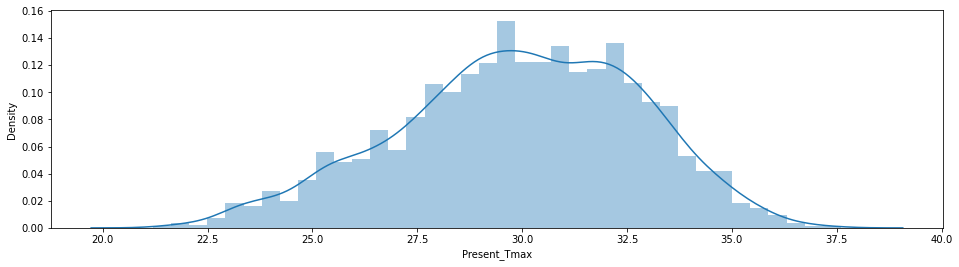

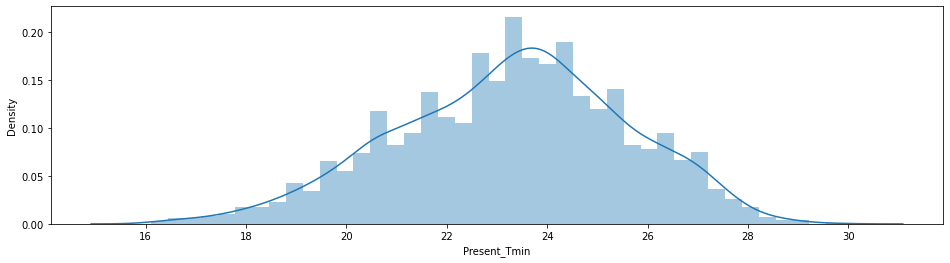

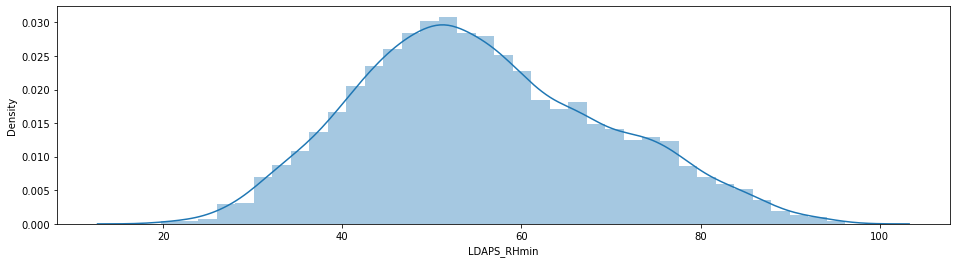

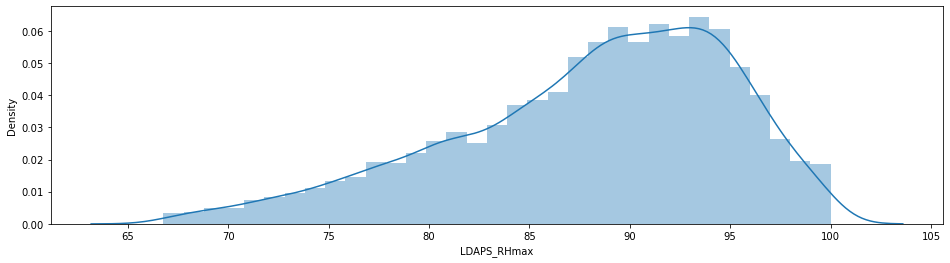

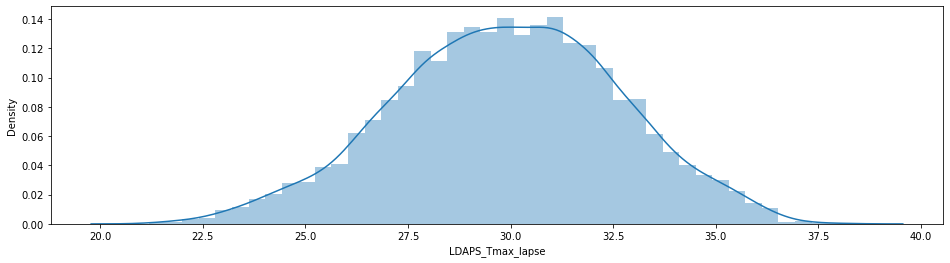

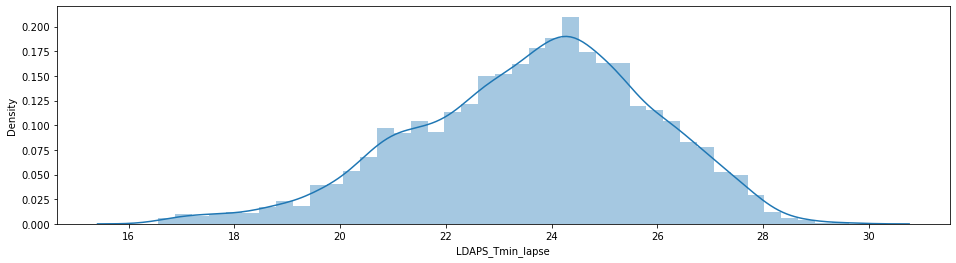

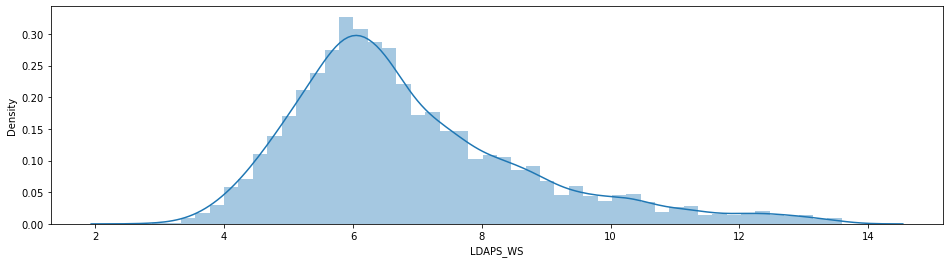

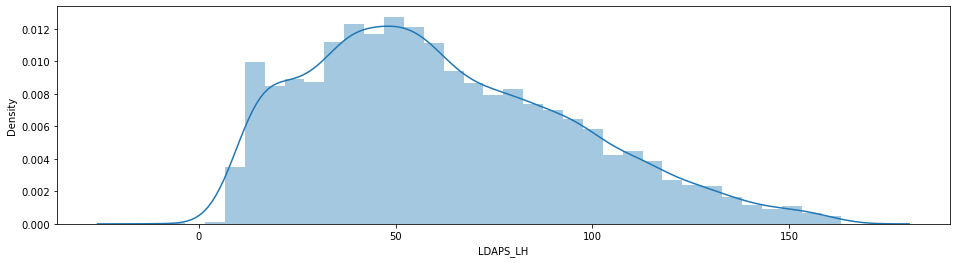

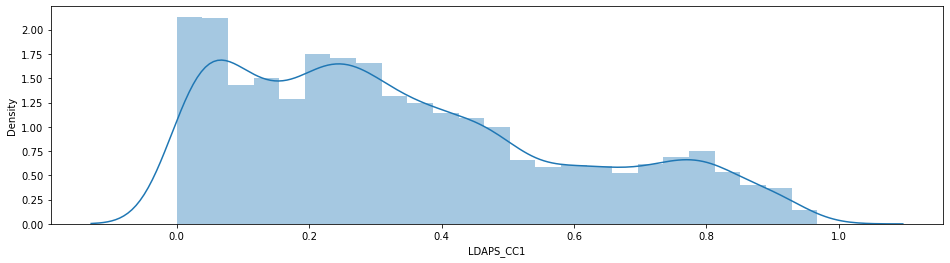

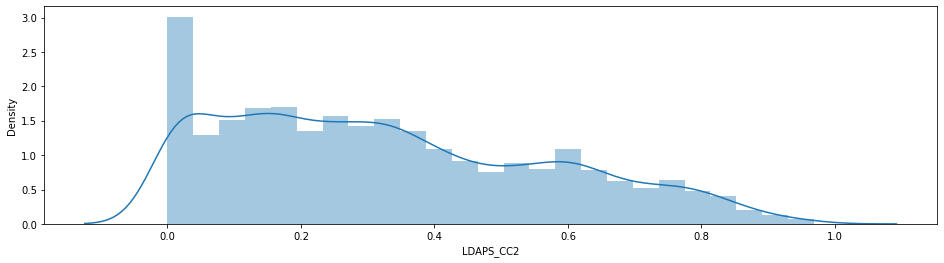

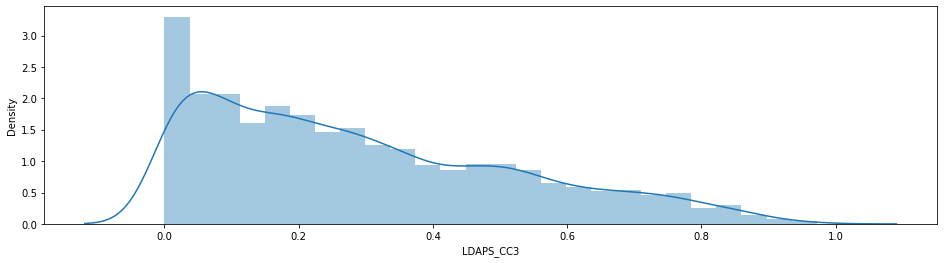

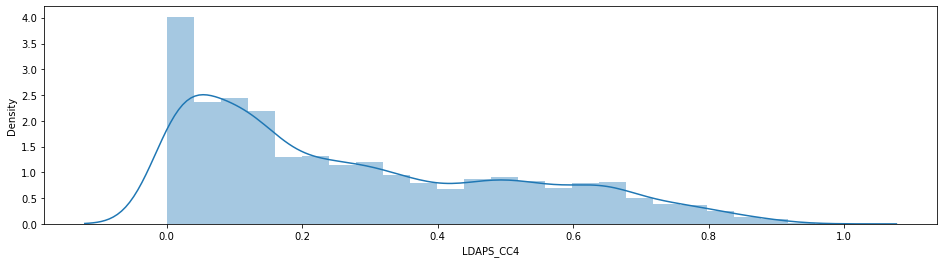

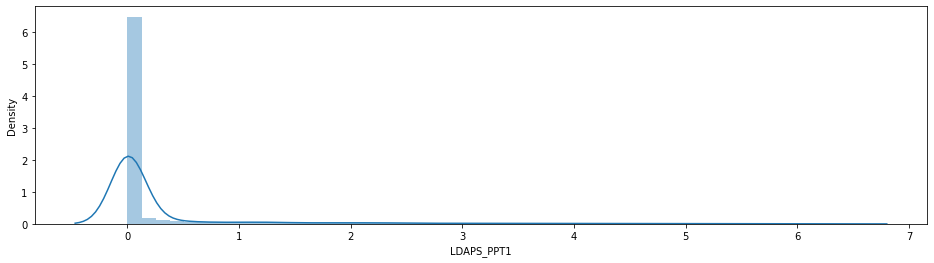

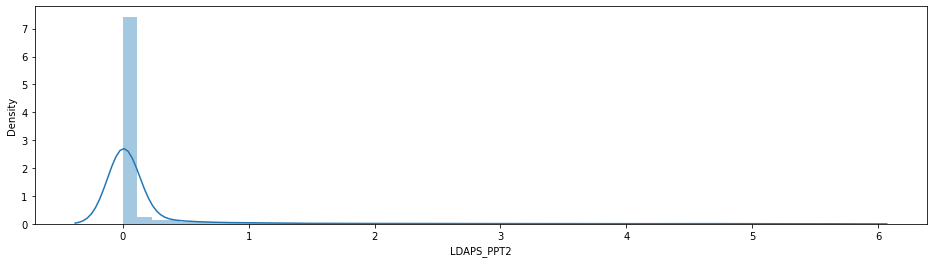

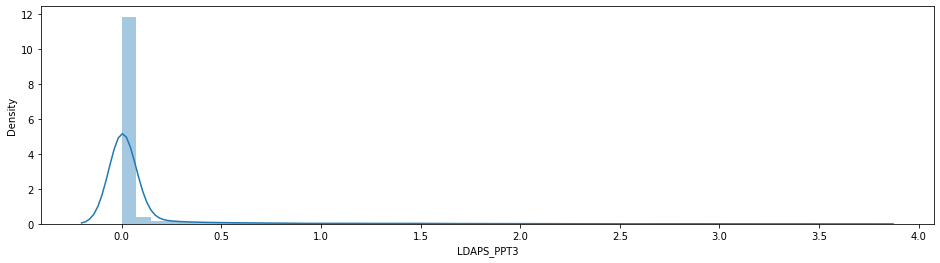

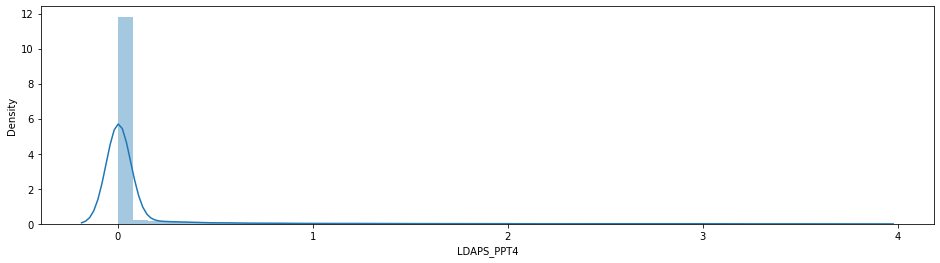

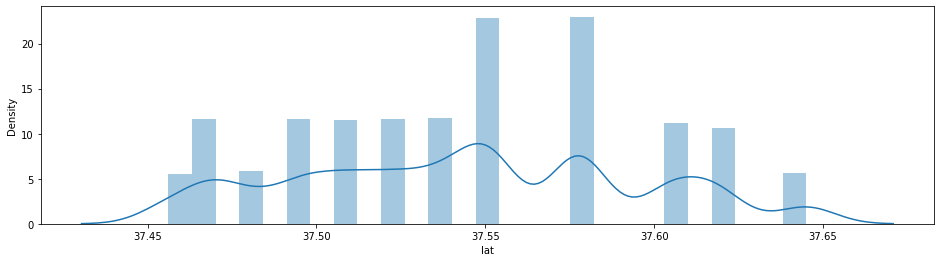

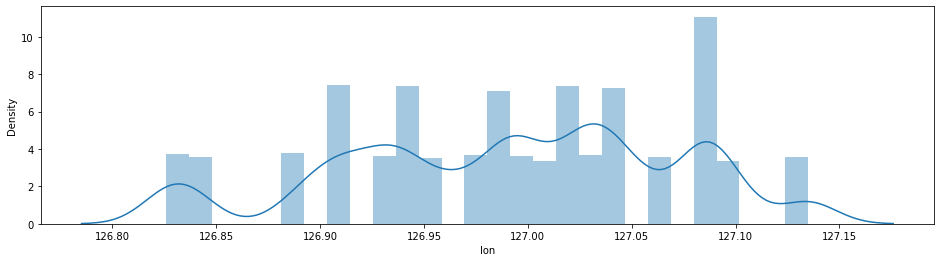

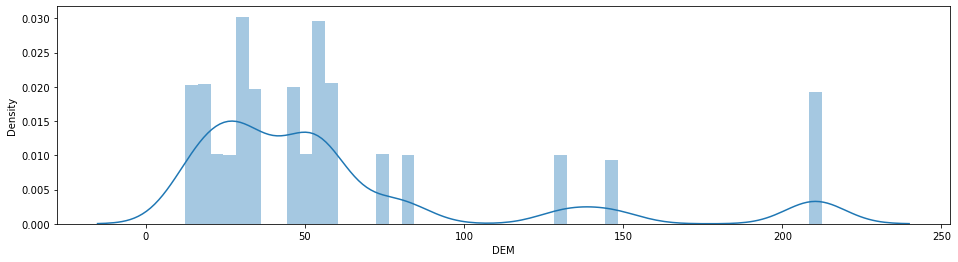

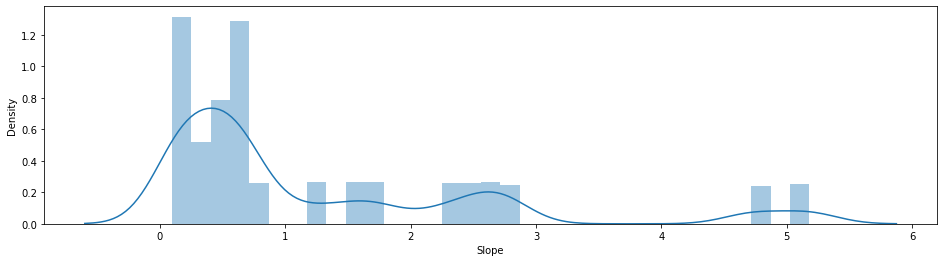

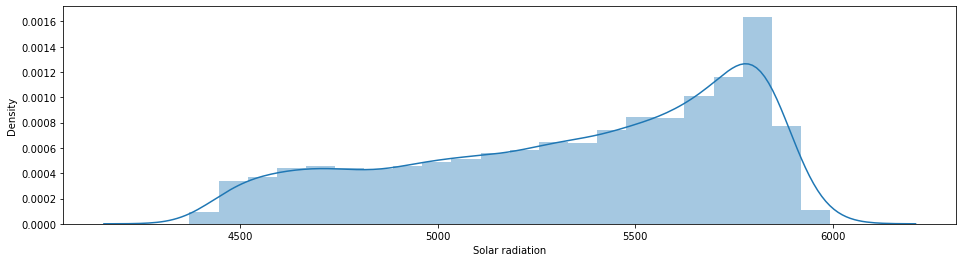

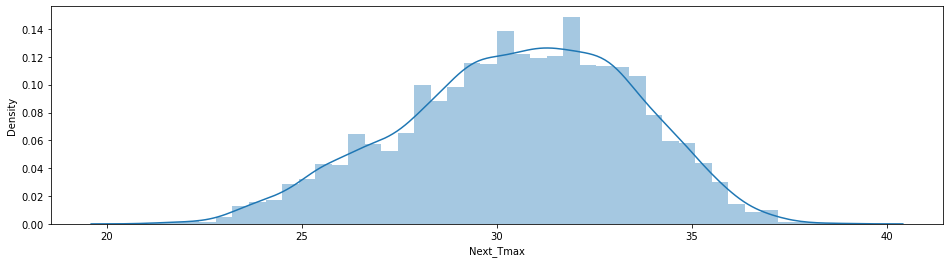

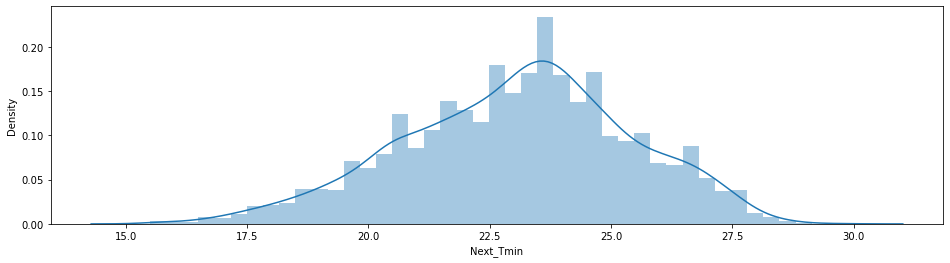

In [41]:
for col in num_var:
    fig_of_size(16,4)
    sns.distplot(df_cleaned[col])

In [42]:
# skew stats

In [43]:
df_cleaned.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

In [44]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [ ]:
# removing the redundant features

In [57]:
df_cleaned.drop(['station','Date'],1,inplace=True)

In [58]:
df_cleaned.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [ ]:
## One Hot Encoding the categorical variables

In [59]:
df_cleaned.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [62]:
df_cleaned

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


## X and y split

In [64]:
X = df_cleaned.drop(['Next_Tmax','Next_Tmin'],1)
y = df_cleaned[['Next_Tmax','Next_Tmin']]

In [63]:
# checking the shapes
X.shape,y.shape

((6739, 23), (6739, 2))

In [65]:
X.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246


In [66]:
y.head()

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5


# train test split

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [68]:
# checking the shapes
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4717, 21), (4717, 2), (2022, 21), (2022, 2))

## Building the model

In [74]:
# importing the training dependencies
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [75]:
# importing the evaluation metrics
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import r2_score,mean_squared_error

In [76]:
# helper function
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    
    print('R2_score',r2_score(y_test,y_preds))
    print('MSE',mean_squared_error(y_test,y_preds))

* MULTITARGET LINEAR REGRESSION.

In [77]:
model = LinearRegression()

In [78]:
model.fit(X_train,y_train)

LinearRegression()

In [79]:
y_preds = pd.DataFrame(model.predict(X_test),columns=['Max','Min'])

In [80]:
y_preds.iloc[:,0]

0       30.548713
1       28.621201
2       30.427265
3       33.361571
4       31.787048
          ...    
2017    24.379602
2018    32.491635
2019    29.477128
2020    26.582759
2021    26.422920
Name: Max, Length: 2022, dtype: float64

In [81]:
y_test

,Next_Tmax,Next_Tmin
491,30.9,22.0
2867,30.2,21.8
5274,33.3,26.9
2344,35.1,23.7
2521,31.2,21.9
...,...,...
7354,26.3,20.3
1824,34.2,23.0
3257,29.3,21.0
3422,26.6,21.6


In [82]:
model.score(X_test,y_test)

0.7786286178561865

In [83]:
train_n_ret_scores(LinearRegression())

R2_score 0.7786286178561865
MSE 1.598259508916116


* KNN MULTI-TARGET 

In [84]:
model = KNeighborsRegressor()

In [85]:
model.fit(X_train,y_train)

KNeighborsRegressor()

In [86]:
train_n_ret_scores(KNeighborsRegressor())

R2_score 0.4974149896700843
MSE 3.474913254203756


* Decision Tree

In [87]:
model = DecisionTreeRegressor()

In [88]:
train_n_ret_scores(DecisionTreeRegressor())

R2_score 0.7133641195589328
MSE 2.023946587537095


* Random Forest 

In [90]:
model = RandomForestRegressor()

In [91]:
train_n_ret_scores(RandomForestRegressor())

R2_score 0.8791823945595436
MSE 0.8527611543026714
